<a href="https://colab.research.google.com/github/maduartee34/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario
materias = ['Matemáticas', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Ciencias Sociales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología']

# Función para generar nombres aleatorios (puedes mejorarla con una lista más amplia)
def generar_nombre():
  nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Jose', 'Sofia', 'Luis', 'Laura', 'Diego', 'Carolina']
  apellidos = ['Perez', 'Gomez', 'Rodriguez', 'Lopez', 'Gonzalez', 'Martinez', 'Sanchez', 'Romero', 'Diaz', 'Torres']
  return f"{random.choice(nombres)} {random.choice(apellidos)}"


# Crear un DataFrame vacío
data = {'Apellido y Nombre': [], 'Nro_DNI': [], 'Materia Escolar': [], 'Nota 1er Trimestre': [], 'Nota 2do Trimestre': [], 'Nota 3er Trimestre': [], 'Faltas a clases': []}
df = pd.DataFrame(data)


# Generar 100 filas de datos aleatorios
for _ in range(100):
    nombre = generar_nombre()
    dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)

    nueva_fila = pd.DataFrame({'Apellido y Nombre': [nombre], 'Nro_DNI': [dni], 'Materia Escolar': [materia], 'Nota 1er Trimestre': [nota1], 'Nota 2do Trimestre': [nota2], 'Nota 3er Trimestre': [nota3], 'Faltas a clases': [faltas]})
    df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))


    Apellido y Nombre     Nro_DNI      Materia Escolar  Nota 1er Trimestre  \
0         Jose Romero  49975804.0  Lengua y Literatura                 9.0   
1    Carolina Sanchez  89671056.0               Inglés                10.0   
2         Maria Perez  65993358.0    Ciencias Sociales                 7.0   
3  Carolina Rodriguez  46853365.0          Matemáticas                 6.0   
4         Diego Gomez  72786868.0               Inglés                 1.0   
5         Jose Torres  61545580.0  Lengua y Literatura                 1.0   
6      Carolina Perez  71387913.0               Inglés                 3.0   
7        Sofia Romero  81700901.0    Ciencias Sociales                 7.0   
8          Sofia Diaz  73722391.0              Química                 7.0   
9         Diego Lopez  50660294.0               Inglés                 4.0   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                 7.0                 9.0             13.0  
1                 9

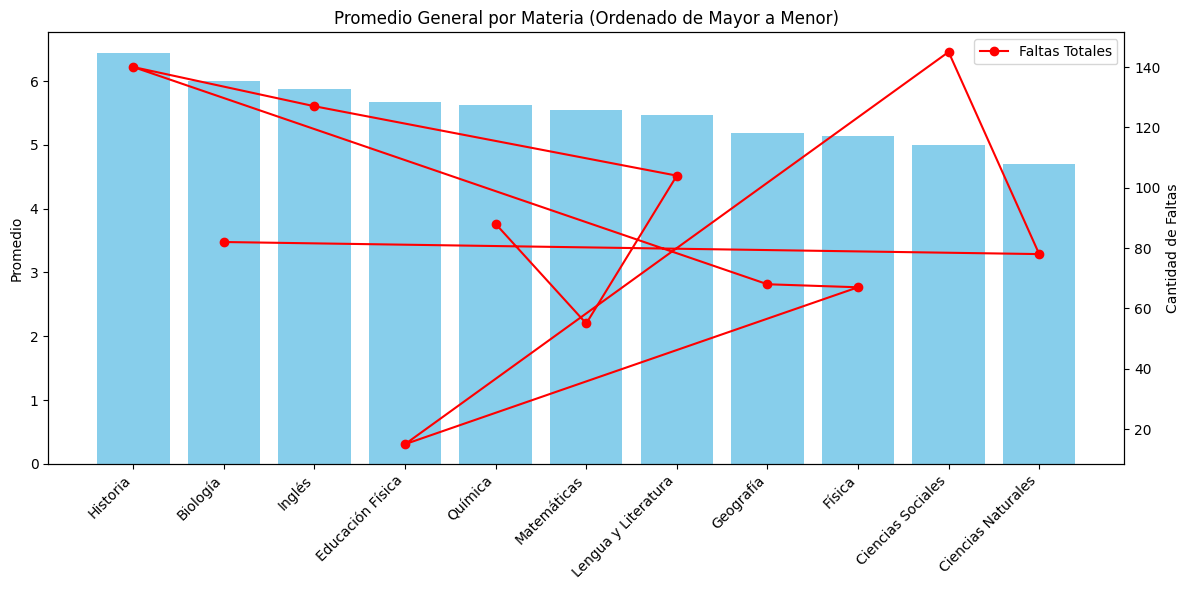

In [5]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular las faltas totales por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax1 = plt.bar(promedios_ordenados.index, promedios_ordenados.values, color='skyblue', label='Promedio General')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Promedio')
plt.title('Promedio General por Materia (Ordenado de Mayor a Menor)')

# Agregar las faltas como un segundo eje
ax2 = plt.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o', label='Faltas Totales')
plt.ylabel('Cantidad de Faltas')

# Agregar leyendas
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()